<a href="https://colab.research.google.com/github/malleedi/COMP562FinalProject/blob/main/SVM-RFR-LR-Models_without_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving socal2.csv to socal2.csv


In [2]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv(io.BytesIO(uploaded['socal2.csv']))
# Dataset is now stored in a Pandas Dataframe

In [3]:
# Printing first 5 records of the dataset
print(dataset.head(5))

   image_id                 street             citi  n_citi  bed  bath  sqft  \
0         0  1317 Van Buren Avenue  Salton City, CA     317    3   2.0  1560   
1         1         124 C Street W      Brawley, CA      48    3   2.0   713   
2         2        2304 Clark Road     Imperial, CA     152    3   1.0   800   
3         3     755 Brawley Avenue      Brawley, CA      48    3   1.0  1082   
4         4  2207 R Carrillo Court     Calexico, CA      55    4   3.0  2547   

    price  
0  201900  
1  228500  
2  273950  
3  350000  
4  385100  


## Data Pre-processing

In [4]:
dataset.shape

(15474, 8)

In [5]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 2
Integer variables: 5
Float variables: 1


## Exploratory Data Analysis

<ipython-input-6-9e8f894519cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

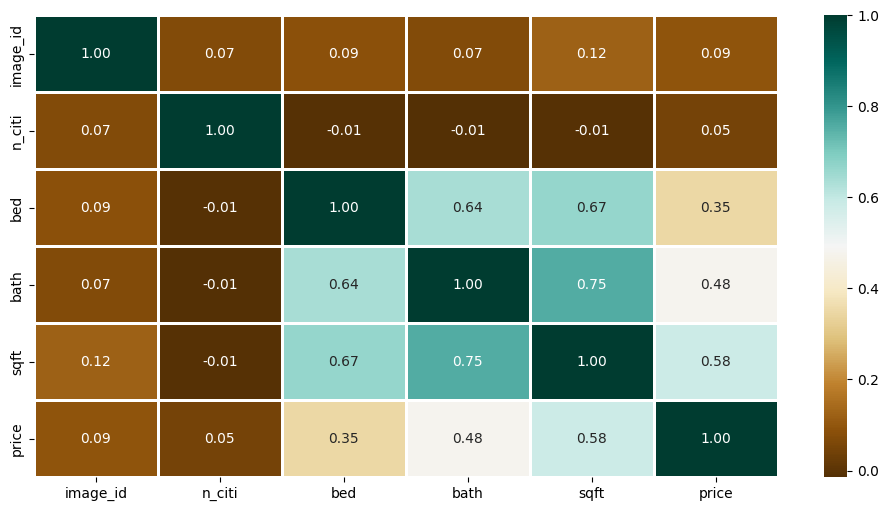

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

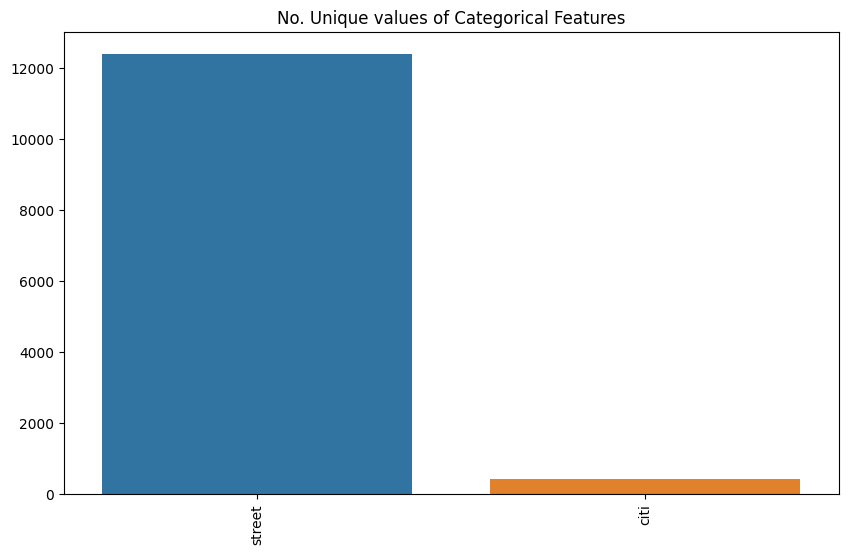

In [7]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

## Data Cleaning

In [8]:
dataset['price'] = dataset['price'].fillna(dataset['price'].mean())
new_dataset = dataset.dropna()
new_dataset.isnull().sum()

image_id    0
street      0
citi        0
n_citi      0
bed         0
bath        0
sqft        0
price       0
dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', len(object_cols))

Categorical variables:
['street', 'citi']
No. of. categorical features:  2


## One Hot Encoder

In [10]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final_OH = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Splitting Dataset into Train and Test Data

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['price'], axis=1)
Y = df_final['price']

# Split the training set into training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X_OH = df_final_OH.drop(['price'], axis=1)
Y_OH = df_final_OH['price']

# Split the training set into training and validation set for OH dataframe
X_train_OH, X_valid_OH, Y_train_OH, Y_valid_OH = train_test_split(X_OH, Y_OH, train_size=0.8, test_size=0.2, random_state=0)

## Support Vector Machine Model (SVM)

In [12]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train_OH,Y_train_OH)
Y_pred_OH = model_SVR.predict(X_valid_OH)

print(mean_absolute_percentage_error(Y_valid_OH, Y_pred_OH))

0.45412022303680155


## Random Forest Regression Model

In [13]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train_OH, Y_train_OH)
Y_pred_OH = model_RFR.predict(X_valid_OH)

mean_absolute_percentage_error(Y_valid_OH, Y_pred_OH)

0.0503172340958962

## Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.3897506665670917
